<a href="https://colab.research.google.com/github/MGSev/Workbook-DLMAIIAC-Casual-Inference/blob/main/TASK_5_DLMAIIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 5
Design a study to investigate the effect of a new educational program on students’ academic performance.
Explain how you would identify and adjust for potential confounders, mediators, and colliders in your analysis.
Include in your answer an outline of how directed acyclic graphs (DAGs) could represent the causal relationships
and what method(s) you might use to correct for any identified biases.


The original dataset is the Kaggle dataset "Students' Academic Performance Dataset" (https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data).

The "Students' Academic Performance Dataset" dataset was modified to respond to task 5 while keeping the original dimension.




In [ ]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install dowhy
import dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


In [2]:
# Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving Modified_EduProgram.csv to Modified_EduProgram.csv


In [ ]:
from google.colab import files
files.download('Modified_EduProgram.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Read this file Educational_Program.csv and disiplay the columns

import pandas as pd
import io
# Load the dataframe.
df = pd.read_csv('Modified_EduProgram.csv')

# Print some info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   School Level              480 non-null    object 
 2   StudentAbsenceDays        480 non-null    object 
 3   Student_Motivation        480 non-null    int64  
 4   Classroom_Absence         480 non-null    int64  
 5   Partecipation_in_Program  480 non-null    int64  
 6   Socioeconomic_Status      480 non-null    int64  
 7   Grade_Before_Program      480 non-null    float64
 8   Grade_After_Program       480 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.9+ KB


In [4]:
#Display columns
df.head()

,gender,School Level,StudentAbsenceDays,Student_Motivation,Classroom_Absence,Partecipation_in_Program,Socioeconomic_Status,Grade_Before_Program,Grade_After_Program
0,M,MiddleSchool,Under-7,1,1,0,3,44.74,49.16
1,M,MiddleSchool,Under-7,1,1,1,1,72.63,81.03
2,M,MiddleSchool,Above-7,1,1,0,2,54.48,61.26
3,M,MiddleSchool,Above-7,1,1,0,2,85.58,81.76
4,M,MiddleSchool,Above-7,0,1,0,3,54.36,61.33


In [5]:
#Convert StudentAbsenceDays into a binary column StudentAbsenceDays Under-7= 0  StudentAbsenceDaysAbove -7 = 1
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})
df.head()

,gender,School Level,StudentAbsenceDays,Student_Motivation,Classroom_Absence,Partecipation_in_Program,Socioeconomic_Status,Grade_Before_Program,Grade_After_Program
0,M,MiddleSchool,0,1,1,0,3,44.74,49.16
1,M,MiddleSchool,0,1,1,1,1,72.63,81.03
2,M,MiddleSchool,1,1,1,0,2,54.48,61.26
3,M,MiddleSchool,1,1,1,0,2,85.58,81.76
4,M,MiddleSchool,1,0,1,0,3,54.36,61.33


In [6]:
# Drop column Classroom_Absence
drop_columns = ['Classroom_Absence']
df = df.drop(drop_columns, axis=1)
df.head()

,gender,School Level,StudentAbsenceDays,Student_Motivation,Partecipation_in_Program,Socioeconomic_Status,Grade_Before_Program,Grade_After_Program
0,M,MiddleSchool,0,1,0,3,44.74,49.16
1,M,MiddleSchool,0,1,1,1,72.63,81.03
2,M,MiddleSchool,1,1,0,2,54.48,61.26
3,M,MiddleSchool,1,1,0,2,85.58,81.76
4,M,MiddleSchool,1,0,0,3,54.36,61.33


# Using DoWhy to estimate the causal effect

## STEP 1 Create a Causal Graph

Warning: Unobserved variable School Level.

The unobserved variable School Level was kept as a constant (MiddleSchool) across all observation. Thus excluded from the causal graph.

In [ ]:
# Create a Casual Graph

causal_graph = """
digraph {
gender->Student_Motivation;
gender->Grade_After_Program;
gender->Partecipation_in_Program;
Socioeconomic_Status -> Student_Motivation;
Socioeconomic_Status->StudentAbsenceDays;
Socioeconomic_Status->Grade_Before_Program;
Socioeconomic_Status -> Grade_After_Program
Student_Motivation->StudentAbsenceDays;
Student_Motivation->Grade_Before_Program;
Student_Motivation->Grade_After_Program;
StudentAbsenceDays->Grade_Before_Program;
StudentAbsenceDays->Grade_After_Program;
Grade_Before_Program->Grade_After_Program;
Partecipation_in_Program->Grade_After_Program;
StudentAbsenceDays->Grade_After_Program;
Socioeconomic_Status -> Partecipation_in_Program;
Student_Motivation -> Partecipation_in_Program;
Partecipation_in_Program -> Grade_After_Program;

}
"""


# Assumptions:


All data are measurable.

All data are from an observational study.

The Cofounder Gender includes F = Female, M = Male.
Assuming the program’s impact was uniform across genders, the subset analyses of Males and Females were not performed.

Middle school age between 11 and 15 years old.

Socioeconomic status is an umbrella variable that includes access to private transportation and no after-school jobs.

Student absences are another broad variable encompassing health issues, transportation barriers, disengagement from school, or family duties (e.g., taking care of a sick family member).

Student absences were transformed from a continuous variable into a binary variable: 0 = no absence, 1 = absent.

The school level variable (MiddleSchool) was assumed equal across all levels, so it was not included as an influence variable because it did not add any extra information to the other variables.


# -Confounders

-Socioeconomic Status is a confounder. It influences Student Motivation, -StudentAbsenceDay, Grade Before_the_Program, Grade_after_the Program, Partecipation_in_Program

Students from wealthy families have access to better schools that can improve their grades before and after enrolling in the program, better private transportation, and no need for an after-school job to sustain their tuition fees, reducing their absences. They also might have family support, boosting their motivation.

-Student Motivation influences Participation in the Program and Grade_After_The_Program

-**Student Motivation is also a mediator**. Socioeconomic Status and gender influence it. Student Motivation transmits the effects of the influenced variables on Grade_After_The_Program and Partecipation _in_Program

Motivated students are more engaged, less prone to social media distraction,  more prone to put more energy into studying, more prone to overcome challenging exams and setbacks, focusing on long-term goals and completation of the study cycle. Their motivation is to mitigate the effect of low socioeconomic status, putting more effort and overperforming in contrast to high socioeconomic status students.

-Gender affects Participation in the Program and Outcome (though Motivation) Grade After The Program. Even though the subsets male and female analyses were not conducted, gender is a confounder because social or cultural norms lead boys and girls to participate in programs at different rates. Boys tend to skip school, while girls are more diligent and have higher attendance and homework completion. However, boys may outperform in math while girls excel in reading.

# -Mediators

-Student_Motivation (already explained)

-StudentAbsenceDay is a Mediator.
 It lies on a casual path Socioeconomic_Status->Student_Motivation->Grade_Before_Program-> and inderectly Grade_After_Program

Low Socioeconomic status leads to more absence due to lack of access to transportation, good quality healthcare, and family care. More absences lead to lower grades.

Higher-motivated students tend to participate in lectures (with fewer absences) regularly.

Lower Motivated students tend to skip lectures, unfinished assignments, and challenging subjects, leading to lower grades and more absences.


# -Collider

-Grade_Before_Program is influenced by Socioeconomic Status, Student Motivation, and StudentAbsenceDay influence it.

-Socioeconomic Status: Students from wealthy families have access to better education (school, tutor, books, computer, solid family) leading to better academic grades

-Highly motivated students are more engaged, put more effort in study, tend to have regular attendance, challenge themself with complicated subjects leading to better academic grades.

-Frequent absences lead to lower academic performance, less engagegemt and poor academic performance.


Note

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


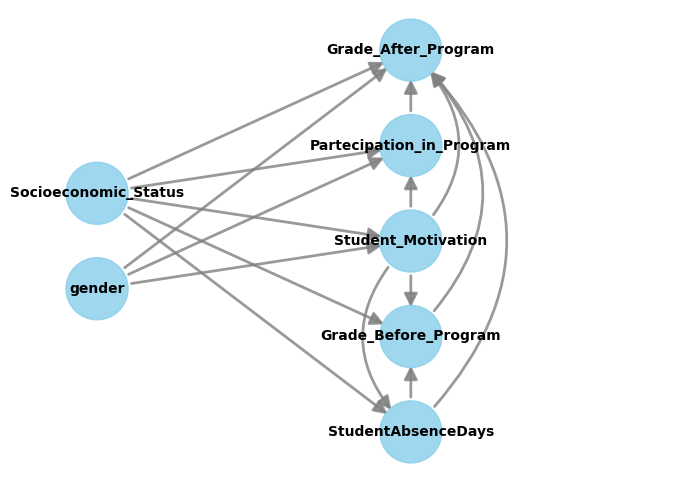

In [ ]:
# Visualizing a causal model: the treatment='Partecipation_in_Program', and the outcome='Grade_After_Program'

model= dowhy.CausalModel(
    data = df,
    graph=causal_graph.replace("\n", " "),
    treatment='Partecipation_in_Program',
    outcome='Grade_After_Program'
)

model.view_model()

# Step-2. Identify the Causal Effect

In [ ]:
#Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                                    
───────────────────────────(E[Grade_After_Program|gender,Socioeconomic_Status,Student_Motivation])
d[Partecipation_in_Program]                                                                       
Estimand assumption 1, Unconfoundedness: If U→{Partecipation_in_Program} and U→Grade_After_Program then P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation,U) = P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Interpretation:

No front door casual path found.

No instrumental variables were identified.

A backdoor estimand was identified.

This means that the causal effect of Participation_in_Program (on the conditional expectation of Grade_After_Program) needs to be conditioned on Gender, Socioeconomic Status, and Student Motivation.

After controlling for these variables, all backdoor paths were blocked to obtain a valid causal estimate.

# Step-3. Estimate the identified estimand
Based on the identified causal effect, the model was adjusted to isolate the impact of Motivation, Socioeconomic Status, and gender. Avoid conditioning on the collider Grade_Before_Program because it can introduce a spurious correlation.

Method Used: Propensity Score Stratification

The propensity score mimics an RCT by creating a quasi-experimental design from observational data. Based on the propensity score, it matches treated (students who participated in the program) and untreated (students who did not participate) pairs.

Propensity score stratification divides and orders treated (students who participated in the program) and untreated (students who did not participate)  samples into strata (e.g., 5 groups) based on similar propensity scores.
This process makes treated and untreated groups comparable, computing the program's effect separately in each stratum,  and allows for the computation of the ATE ( Average Treatment Effect).

In [ ]:
#Propensity score stratification adjusting for Motivation, Socio_Economic_Status, and gender

stratified_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_stratification",
    method_params={
        "confounders": ["Socioeconomic_Status", "Student_Motivation", "gender"],
        "num_strata": 5
    }
)

print(stratified_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                                    
───────────────────────────(E[Grade_After_Program|gender,Socioeconomic_Status,Student_Motivation])
d[Partecipation_in_Program]                                                                       
Estimand assumption 1, Unconfoundedness: If U→{Partecipation_in_Program} and U→Grade_After_Program then P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation,U) = P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation)

## Realized estimand
b: Grade_After_Program~Partecipation_in_Program+gender+Socioeconomic_Status+Student_Motivation
Target units: ate

## Estimate
Mean value: 0.01638145402713539



Result Explanation: After adjusting for socioeconomic status, gender, and motivation through propensity score stratification, the ATE (average treatment effect) estimate of the program's effect on Grade_after_Program is approximately 0.0164, indicating a small positive effect on grades.

Statistically significant:
Null Hypothesis (H₀): Participation in the program does not improve Grade_After_Program

Alternative Hypothesis (H₁): Participation in the program improves Grade_After_Program.


In [ ]:

# Checking for statistical significance of the ATE  0.0164 and 95% Confidence interval

# Get ATE
print("ATE:", stratified_estimate.value)

# Get confidence intervals
confidence_intervals = stratified_estimate.get_confidence_intervals()

# Get 95% Confidence Interval
print("95% Confidence Interval:", confidence_intervals)

# Print the standard error from confidence interval  Assuming 95% of Confidence Interval
standard_error = (confidence_intervals[1] - confidence_intervals[0]) / (2 * 1.96)
print("Standard Error:", standard_error)

# Checking if zero is within the 95% confidence interval
if confidence_intervals[0] <= 0 <= confidence_intervals[1]:
    print("The result is not statistically significant because zero is in the CI).")
else:
    print("The result is statistically significant becuase zero is not in the CI).")

ATE: 0.01638145402713539
95% Confidence Interval: (np.float64(-1.8801912692684324), np.float64(2.1982021405296366))
Standard Error: 1.0404064820913443
The result is not statistically significant because zero is in the CI).


The ATE result is not statistically significant, which implies we do not have sufficient evidence to reject the null hypothesis (H0), this does not prove the program is ineffective, It means we do not have enough evidence to confirm that it works.


Inadequate stratification that failed to balance confounders properly,
uncontrolled confounding variables that were not accounted for
Insufficient sample size, might be the cause of lack of statistical evidence.

Potential unaccounted confounding variables may include:


Teaching quality,

Learning disorders (Dyslexia, Dyscalculia),

School infrastracture(access to technology, extracurricula support),

Family support (help with homework),  

Social and academic atmosphere (peer group motivation)











The previous statistical test showed that the ATE result is not statistically significant. Propensity score matching will isolate and balance the impact of the covariates Motivation, Socioeconomic Status, and Gender.

The goal is to reduce bias and balance covariates between the treatment and control groups. Propensity score matching mimics an RCT by creating a quasi-experimental design from observational data.

It matches treated (students who participated in the program)-untreated (students who did not participate) pairs based on the propensity score.

The propensity score is the conditional probability (0-1) of receiving the treatment given a set of observed covariates (Motivation, Socioeconomic Status, and Gender). (Murphy et al., 2014).

In this study, the propensity score is calculated based on the covariates: Motivation, Socioeconomic Status, and gender.

After calculating the propensity score, the most comparable samples are paired by matching treated students with similar untreated students based on their likelihood of receiving the treatment. ATE will be computed on matched samples to estimate the program's impact while controlling for confounders.





In [ ]:
#Propensity score matching adjusting for Motivation, Socio_Economic_Status, and gender

matched_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching",
    method_params={
        "confounders": ["Socioeconomic_Status", "Student_Motivation", "gender"],
        "matching_params": {"caliper": 0.1, "replace": False}
    }
)

print(matched_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                                    
───────────────────────────(E[Grade_After_Program|gender,Socioeconomic_Status,Student_Motivation])
d[Partecipation_in_Program]                                                                       
Estimand assumption 1, Unconfoundedness: If U→{Partecipation_in_Program} and U→Grade_After_Program then P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation,U) = P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation)

## Realized estimand
b: Grade_After_Program~Partecipation_in_Program+gender+Socioeconomic_Status+Student_Motivation
Target units: ate

## Estimate
Mean value: 0.3025416666666667



The propensity score matching shows a positive ATE of 0.303, suggesting the program may have improved grades.

The propensity score matching shows an ATE of 0.303, higher than the propensity score stratification's ATE of 0.016.

The different results might indicate that propensity score stratification did not effectively adjust for confounders as effectively as matching.

However, we need to assess whether the ATE of  0.303 is statistically significant or not to reject the null hypothesis (H₀).

Null Hypothesis (H₀): Participation in the program does not improve Grade_After_Program Alternative Hypothesis (H₁): Participation in the program improves Grade_After_Program.


In [ ]:
# Checking for statistical significance compute the 95% confidence interval

# Get ATE
print("ATE:", matched_estimate.value)

# Get confidence intervals
confidence_intervals = matched_estimate.get_confidence_intervals()

# Get 95% Confidence Interval
print("95% Confidence Interval:", confidence_intervals)

# Print the standard error from confidence interval Assuming 95% of Confidence Interval
standard_error = (confidence_intervals[1] - confidence_intervals[0]) / (2 * 1.96)
print("Standard Error:", standard_error)

# Checking if zero is within the 95% confidence interval
if confidence_intervals[0] <= 0 <= confidence_intervals[1]:
    print("The result is not statistically significant because zero is in the CI).")
else:
    print("The result is statistically significant becuase zero is not in the CI).")


ATE: 0.3025416666666667
95% Confidence Interval: (np.float64(-4.677645833333334), np.float64(5.335291666666667))
Standard Error: 2.554320790816327
The result is not statistically significant because zero is in the CI).


Null Hypothesis (H₀): Participation in the program does not improve Grade_After_Program
Alternative Hypothesis (H₁): Participation in the program improves Grade_After_Program.
The ATE result is not statistically significant, and due to insufficient evidence, the null hypothesis (H0) cannot be rejected. It suggest there is not enough  evidence to establish the program's effectiveness, but it does not prove that the program is inadequate.

Potential explanations for the non-significance could involve:
 Improper matching failed to balance confounders properly. Uncontrolled confounding variables that were not accounted for. Insufficient sample size Might be the cause of lack of statistical evidence.

Potential unaccounted confounding variables may include

Teaching quality, Learning disorders (Dyslexia, Dyscalculia), School infrastructure (access to technology, extracurricular support), Family support (help with homework),  Social and academic atmosphere (peer group motivation)


The last causal inference method that adjusts for confounding in observational studies is Propensity Score Weighting (IPW)
The intuition behind the IPW is to create balanced samples by reweighting the covariates ("Socioeconomic_Status," "Student_Motivation," "gender")  between treated (students participating in the program) and untreated groups (students not participating in the program), making the two samples statistically comparable in terms of observed covariates, and mimicking the balance achieved in randomized control trial (RCT).

For the treated group (students who are part of the program), the weight is calculated as the reciprocal of the propensity score.
For the untreated group (students not participating in the program), the weight is determined by taking the fraction of 1 divided by 1 minus the propensity score.
Comparing the weighted averages between treated and untreated groups allows the calculation of ATE (Average Treatment Effect)


In [ ]:
# Propensity score inverse probability weighting

weighted_est = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_weighting",
    method_params={
        "confounders": ["Socioeconomic_Status", "Student_Motivation", "gender"],

    }
)

print(weighted_est)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                                    
───────────────────────────(E[Grade_After_Program|gender,Socioeconomic_Status,Student_Motivation])
d[Partecipation_in_Program]                                                                       
Estimand assumption 1, Unconfoundedness: If U→{Partecipation_in_Program} and U→Grade_After_Program then P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation,U) = P(Grade_After_Program|Partecipation_in_Program,gender,Socioeconomic_Status,Student_Motivation)

## Realized estimand
b: Grade_After_Program~Partecipation_in_Program+gender+Socioeconomic_Status+Student_Motivation
Target units: ate

## Estimate
Mean value: 0.003272939988889334




The propensity score inverse probability weighting shows a positive ATE of 0.0032, suggesting the program may have had minor positive effects on grades.

The propensity score weighting shows an ATE of 0.0032, lower than the propensity score matching of  ATE of 0.303, which was positive but not statistically significant.

The discrepancy in the results (0.0032 vs. 0.303) might indicate that propensity score weighting  (IPW) did not adjust for confounders as effectively as matching.

However, before concluding, we need to assess whether the ATE of  0.0032 is statistically significant to  evaluate the rejection of the null hypothesis (H₀).

Null Hypothesis (H₀): Participation in the program does not improve Grade_After_Program
 Alternative Hypothesis (H₁): Participation in the program improves Grade_After_Program.




In [ ]:
# Checking for statistical significance compute the 95% confidence interval

# Get ATE
print("ATE:", weighted_est.value)

# Get confidence intervals
confidence_intervals = weighted_est.get_confidence_intervals()

# Get 95% Confidence Interval
print("95% Confidence Interval:", confidence_intervals)

# Print the standard error from confidence interval Assuming 95% of Confidence Interval
standard_error = (confidence_intervals[1] - confidence_intervals[0]) / (2 * 1.96)
print("Standard Error:", standard_error)

# Checking if zero is within the 95% confidence interval
if confidence_intervals[0] <= 0 <= confidence_intervals[1]:
    print("The result is not statistically significant because zero is in the CI).")
else:
    print("The result is statistically significant because zero is not in the CI).")

ATE: 0.003272939988889334
95% Confidence Interval: (np.float64(-1.6874321904206866), np.float64(1.8810035011230042))
Standard Error: 0.910315227434615
The result is not statistically significant because zero is in the CI).


Final Note

The causal inference methods used to adjust for confounding in observational studies—propensity Score Stratification, Propensity Score Matching, and Propensity Score inverse probability weighting (IPW)—did not produce statistically significant results to reject the Null Hypothesis (H₀): Participation in the program does not improve Grade_After_Program.

** In conclusion, we do not have sufficient evidence to prove that the program improves students' grades.**

Actionable improvement to Redesign the study and check the impact on study quality

Increase the data collection to include unmeasured confounders:

•	Quality of teaching.

•	State of school facilities (housing, dormitories, laboratories, updated technologies).

•	Family support.

•	Academic support from peers or tutors.

•	Learning disorders.

•	Commute distance from school.

•	After-school jobs impacting student absence, motivation, and study hours.

•	Study habits

•	Family environment  

•	Extend the study duration to assess long-term effects




## Step-4 Refutational test
The refutational test is the last validation step in casual inference.
After identifying the estimated effect via DAG and estimation method, the refutational test checks whether the estimated effect is robust or could be explained as spurious due to biases like unobserved confounding, selection bias, and biased model used to estimate the effect does not represent the data-generating process (for examples assuming linear relationship when the actual effect is not linear). Passing the refutational test ensures that the estimated effect is casual and not due to other noises.

There are three refutational tests:

Method-1
Random Common Cause:- Adds randomly drawn covariates to data and re-runs the analysis to see if the causal estimate changes or not. If our assumption was originally correct then the causal estimate shouldn't change by much.


Method-2
Placebo Treatment Refuter:- Randomly assigns any covariate as a treatment and re-runs the analysis. If our assumptions were correct then this newly found out estimate should go to 0.


Method-3
Data Subset Refuter:- Creates subsets of the data(similar to cross-validation) and checks whether the causal estimates vary across subsets. If our assumptions were correct there shouldn't be much variation.


PyWhy. (n.d.). DoWhy: The causal story behind hotel booking cancellations [Jupyter Notebook]. GitHub. https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/DoWhy-The%20Causal%20Story%20Behind%20Hotel%20Booking%20Cancellations.ipynb

In [ ]:
# Method-1 Random Common Cause:
random_common_test = model.refute_estimate(
    identified_estimand,
    matched_estimate,
    "random_common_cause"
)

print(random_common_test)

Refute: Add a random common cause
Estimated effect:0.3025416666666667
New effect:0.30254166666666665
p value:1.0



In [ ]:
# Method-2 Placebo Treatment

placebo_test = model.refute_estimate(
    identified_estimand,
    matched_estimate,
    "placebo_treatment_refuter"
)

print (placebo_test)

Refute: Use a Placebo Treatment
Estimated effect:0.3025416666666667
New effect:-0.10832458333333334
p value:0.94



In [ ]:
# Method-3 Data Subset Refuter:
Data_subset_test = model.refute_estimate(
    identified_estimand,
    matched_estimate,
    "data_subset_refuter"

)

print(Data_subset_test)

Refute: Use a subset of data
Estimated effect:0.3025416666666667
New effect:0.32555078124999953
p value:0.98



# Interpretation results
 Method-1 Random Common Cause:
Artificial confounders will be added randomly generated to test if the estimate remains unchanged.
Null hypothesis (H₀) that the result is stable.
Alternative Hypothesis (H₁) that the result is not stable.

Original estimate:0.30254
New Estimate 0.3025
p- value:1.0
The original and new estimate results (0.30254 - 0.3025 ) are almost the same, and the p-value 1.0 > 0.05 is not strong enough to reject the null hypothesis (H₀) that the result is stable.


Method -2 Placebo Treatment Test
Artifact placebo treatment will be added instead of the original treatment.
Null hypothesis (H₀): The placebo treatment has no effect  (placebo effect = zero)
Alternative Hypothesis (H₁): The placebo treatment has an effect (placebo effect ≠ 0)

Treatment Estimated effect: 0.3025416666666667
New effect:-0.10832458333333334
p -value:0.94

The placebo effect is nearly zero (-0.1083), and the p-value of 0.94 > 0.05  is insufficient to discard the null hypothesis. Therefore, the original effect of 0.3025 is not due to bias.


Method -3 Subset Refuter

Similar to cross-validation, Subsets are generated to verify the stability of the estimated effects across the subsets.
 Sharma, A., Kiciman, E., & others. (2022). DoWhy-The Causal Story Behind Hotel Booking Cancellations [Jupyter Notebook]. PyWhy GitHub. https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/DoWhy-The%20Causal%20Story%20Behind%20Hotel%20Booking%20Cancellations.ipynb

Null Hypothesis (H₀): that the result effect in the subset is equal to the result effect of the whole dataset.

Alternative Hypothesis (H₁): that the result effect in the subset is not equal to the result effect of the whole dataset.


Estimated effect: 0.3025416666666667
New effect: 0.32555078124999953
p-value: 0.98

The estimated and a new effect are very close (0.3025 -0.325).
The result suggests stability across the subset.
In addition, the p-value of 0.98 > 0.05 is not statistically significant to reject the null hypothesis.
Therefore, the result is robust.



In Conclusion

The causal effect of 0.3025 is robust and not distorted from unobserved confounders, placebo artifact, or sampling fluctuation based on the three refutational test